<a href="https://colab.research.google.com/github/Yasmine-Hayder/NeuralNetwork_ML/blob/main/tpRN_YasmineH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
import pandas as pd
url='https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


In [2]:
#2-Afficher les 10 premières lignes du DataFrame.
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#3-Afficher les dimensions du dataframe.
df.shape

(150, 6)

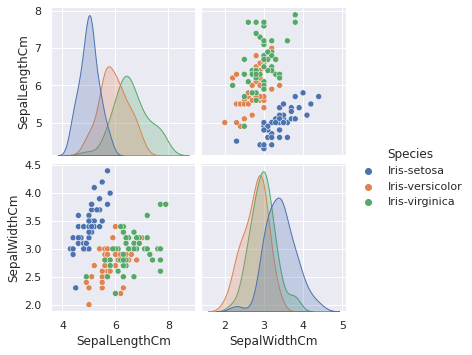

In [2]:
#4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
# Import seaborn
import seaborn as sns
sns.set_theme()
sns.pairplot(
    data=df, vars=("SepalLengthCm","SepalWidthCm") , hue="Species"
)

In [3]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.
for i in range(len(df.axes[0])):
  for j in range(len(df.axes[1])):
    if df.iloc[i,j]=="Iris-setosa":
      df.iloc[i,j]=0
    elif df.iloc[i,j]=="Iris-virginica":
      df.iloc[i,j]=1
    elif df.iloc[i,j]=="Iris-versicolor":
      df.iloc[i,j]=2

In [6]:
#6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [7]:
#7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).
from sklearn import model_selection 
x=df.values[:,0:4]
y=df.values[:,5]
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)


In [8]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
xtrain[0:10]

array([[17, 5.4, 3.9, 1.3],
       [25, 4.8, 3.4, 1.9],
       [140, 6.9, 3.1, 5.4],
       [54, 5.5, 2.3, 4.0],
       [138, 6.4, 3.1, 5.5],
       [24, 5.1, 3.3, 1.7],
       [88, 6.3, 2.3, 4.4],
       [115, 5.8, 2.8, 5.1],
       [98, 6.2, 2.9, 4.3],
       [83, 5.8, 2.7, 3.9]], dtype=object)

In [9]:
xtest[0:10]

array([[40, 5.1, 3.4, 1.5],
       [61, 5.0, 2.0, 3.5],
       [119, 7.7, 2.6, 6.9],
       [114, 5.7, 2.5, 5.0],
       [128, 6.1, 3.0, 4.9],
       [146, 6.7, 3.0, 5.2],
       [121, 6.9, 3.2, 5.7],
       [45, 5.1, 3.8, 1.9],
       [26, 5.0, 3.0, 1.6],
       [55, 6.5, 2.8, 4.6]], dtype=object)

In [10]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur
%%time
from sklearn.neural_network import MLPClassifier 
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=150,alpha=1e-5)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')

CPU times: user 152 µs, sys: 0 ns, total: 152 µs
Wall time: 156 µs


In [17]:
#Learn
rna.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=150,
              solver='lbfgs')

In [39]:
#predict
prediction=rna.predict(xtest)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [38]:
ytest

array([1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2,
       0], dtype=object)

In [40]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.
from sklearn import metrics 
metrics.accuracy_score(list(ytest),prediction)

0.37777777777777777

In [21]:
#11-Afficher la matrice de confusion associée à notre cas.
metrics.confusion_matrix(list(ytest),prediction)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

In [11]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
%%time
import matplotlib.pyplot as plt
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "constant")
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)


CPU times: user 13.4 ms, sys: 1.79 ms, total: 15.1 ms
Wall time: 17.7 ms


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

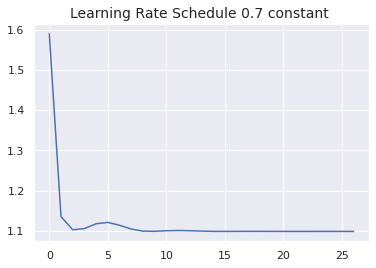

In [29]:
#affichage
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.7 constant ",fontsize=14)
plt.show()

In [14]:
#14-Nous allons étudier la variation du paramètre de taux d’apprentissage
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "constant",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.2,
              max_iter=150, solver='sgd')

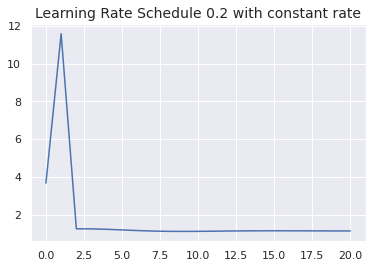

In [15]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with constant rate",fontsize=14)
plt.show()

In [25]:
%%time
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna1.fit(xtrain,ytrain)

CPU times: user 177 ms, sys: 0 ns, total: 177 ms
Wall time: 458 ms


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.2, max_iter=150, solver='sgd')

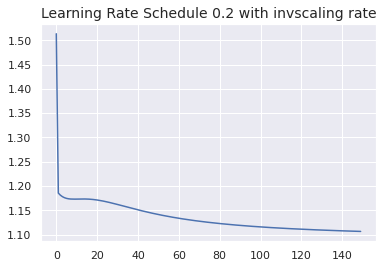

In [26]:
plt.plot(rna1.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with invscaling rate",fontsize=14)
plt.show()

In [29]:

rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.7, max_iter=150, solver='sgd')

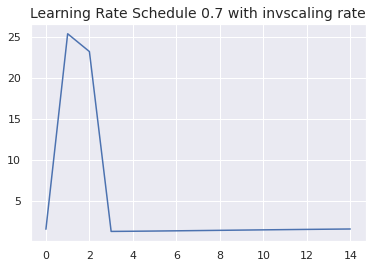

In [28]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.7 with invscaling rate",fontsize=14)
plt.show()

In [89]:
#15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début.
%%time
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=1500,alpha=1e-5)
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')


CPU times: user 2.1 ms, sys: 4 µs, total: 2.1 ms
Wall time: 2.12 ms


In [90]:
#Learn
rna1.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=1500,
              solver='lbfgs')

In [91]:
#predict
prediction=rna1.predict(xtrain)
prediction

array([2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1])

In [92]:
ytrain

array([2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1])

In [93]:
metrics.accuracy_score(list(ytrain),prediction)


1.0

In [94]:
metrics.confusion_matrix(list(ytrain),prediction)

array([[35,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 37]])

In [95]:
#16-Tester d’autres classifieurs de type réseau de neurones 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Dropout
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [96]:
x=df.values[:,0:4]
y=df.values[:,5]
x=x.reshape(x.shape+(1,))
x = np.asarray(x).astype('float32')
y=np_utils.to_categorical(df.values[:,5])
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.8)

In [103]:
#Non récurrent 
model1 = Sequential()

model1.add(Dense(4,input_shape=(4,),activation='relu'))
model1.add(Dense(3,activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
iris_model = model1.fit(xtrain, ytrain, epochs=500, batch_size=7)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 29.8205 - accuracy: 0.3417
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 25.8862 - accuracy: 0.3583
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 22.0540 - accuracy: 0.3500
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 18.2807 - accuracy: 0.3500
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 14.6512 - accuracy: 0.3500
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 11.2718 - accuracy: 0.3500
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 7.6769 - accuracy: 0.3500
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 4.9798 - accuracy: 0.3250
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 3.1947 - accuracy: 0.1000
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 2.8438 - accuracy: 0.1250
Epo

In [104]:
#predict 
pred= model1.predict(xtest)
y_test=np.argmax(ytest,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred

1/1 [==============================] - 0s 68ms/step


array([0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 2])

In [105]:
y_test

array([0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 1, 2])

In [106]:
_,test=model1.evaluate(xtest,ytest)

1/1 [==============================] - 0s 216ms/step - loss: 0.1231 - accuracy: 0.9667


In [109]:
#Récurrent using LSTM
model=Sequential()

model.add(LSTM(4))
model.add(Dense(3,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 3s 7ms/step - loss: 1.1224 - accuracy: 0.0667
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 1.1181 - accuracy: 0.1417
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 1.1141 - accuracy: 0.2083
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1099 - accuracy: 0.3167
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1060 - accuracy: 0.3417
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1022 - accuracy: 0.3583
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0982 - accuracy: 0.3583
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 1.0946 - accuracy: 0.3583
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0912 - accuracy: 0.3583
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 1.0876 - accuracy: 0.3583
Epoch 11/500
4/4 [===========

In [111]:
_,test=model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 22ms/step - loss: 0.3763 - accuracy: 0.9667
